# Network Analysis Assignment

Name - Debanjan Das.
Student ID - 17202833

In [1]:
import urllib
from urllib.request import urlopen
import json
import pandas as pd
from pandas.io.json import json_normalize
import copy

In [2]:
import plotly.graph_objs as go
import networkx as nx

In [3]:
filename = '17202833-dataset1.json'
filename2 = '17202833-dataset2.json'

<b> Network Construction: Dataset 1 (Network 1)

In [4]:
with open(filename) as file:  
    json_obj = json.load(file)    #parsing the json file

In [5]:
df = json_normalize(json_obj)  # storing the data in a dataframe df 
df.head(1)   

,id,name,born,movies
0,0000138,Leonardo DiCaprio,1974-11-11,"[{'id': '5537002', 'title': 'Killers of the Fl..."


In [6]:
column_names = ["id", "title", "actor_id", "actor_name"]
main_data = pd.DataFrame(columns = column_names)  # creating a new dataframe with fewer columns 
main_data

,id,title,actor_id,actor_name


In [7]:
for i, row in df.iterrows():  # iterating over the rows of dataframe df
    movie_list = json_normalize(row["movies"]) # creating a list for movies 
    movie_list["actor_id"] = row["id"] # Storing the id from the dataframe df to a column "actor_id" in movie_list
    movie_list["actor_name"] = row["name"] # Storing actor name 
    movie_list = movie_list[["id", "title", "actor_id", "actor_name"]] 
    main_data = pd.concat([main_data, movie_list]) # putting all data in main_data 
main_data.head(5) 

,id,title,actor_id,actor_name
0,5537002,Killers of the Flower Moon,0000138,Leonardo DiCaprio
1,7131622,Once Upon a Time... in Hollywood,0000138,Leonardo DiCaprio
2,10856690,BYD: Build Your Dreams,0000138,Leonardo DiCaprio
3,10851666,BYD: Make History,0000138,Leonardo DiCaprio
4,1663202,The Revenant,0000138,Leonardo DiCaprio


In [8]:
g = nx.Graph()
for i,row in df.iterrows():
        g.add_node(row["name"])

In [9]:
grouped_data = main_data.groupby("id") # grouping the data by id of the movie 
for movie_id, group in grouped_data: # iterating through the rows of grouped data
    movie_name = group.iloc[0]["title"] 
    actors = group[["actor_id", "actor_name"]] # creating a actor list for every movie 
    if(len(actors) > 1): # If there are more than one more actor, then we link all those actors 
        for i,rows in actors.iterrows():
            for j,row in actors.iterrows():
                g.add_edge( rows["actor_name"], row["actor_name"])
    

In [10]:
g.number_of_nodes(), g.number_of_edges() # printing the number of nodes and edges.

(146, 1396)

In [11]:
for e in g.edges(data=True):
    print(e)

('Leonardo DiCaprio', 'Leonardo DiCaprio', {})
('Leonardo DiCaprio', 'Drew Barrymore', {})
('Leonardo DiCaprio', 'Sharon Stone', {})
('Leonardo DiCaprio', 'Meryl Streep', {})
('Leonardo DiCaprio', 'Kenneth Branagh', {})
('Leonardo DiCaprio', 'Winona Ryder', {})
('Leonardo DiCaprio', 'Brendan Gleeson', {})
('Leonardo DiCaprio', 'Cameron Diaz', {})
('Leonardo DiCaprio', 'Daniel Day-Lewis', {})
('Leonardo DiCaprio', 'Tom Hanks', {})
('Leonardo DiCaprio', 'Jennifer Garner', {})
('Leonardo DiCaprio', 'Cate Blanchett', {})
('Leonardo DiCaprio', 'Vera Farmiga', {})
('Leonardo DiCaprio', 'Golshifteh Farahani', {})
('Leonardo DiCaprio', 'Jonah Hill', {})
('Leonardo DiCaprio', 'Matthew McConaughey', {})
('Leonardo DiCaprio', 'Jean Dujardin', {})
('Leonardo DiCaprio', 'Ben Kingsley', {})
('Leonardo DiCaprio', 'Patricia Clarkson', {})
('Leonardo DiCaprio', 'Adam Driver', {})
('Leonardo DiCaprio', 'Judi Dench', {})
('Leonardo DiCaprio', 'Kurt Russell', {})
('Demi Moore', 'Demi Moore', {})
('Demi Mo

In [12]:
list(nx.isolates(g))  #Checking the isolated nodes

['Soha Ali Khan', 'Kati Outinen']

In [13]:
g.remove_nodes_from(list(nx.isolates(g))) #removing the isolated nodes

In [14]:
list(nx.isolates(g))

[]

C:\Users\User\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.



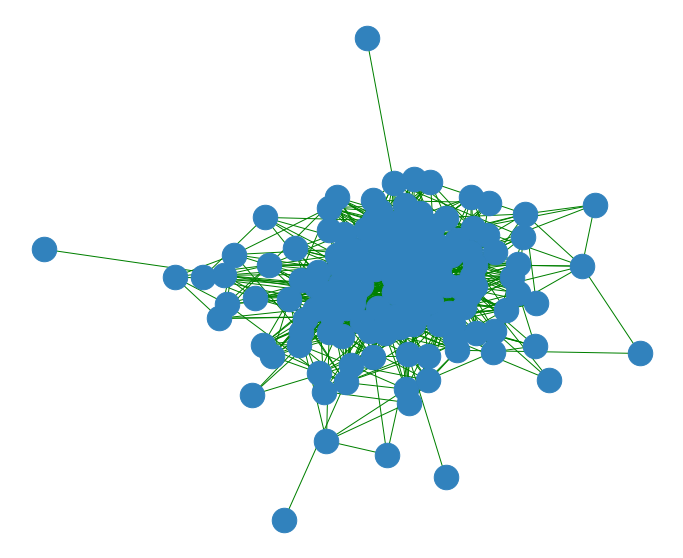

In [15]:
import matplotlib.pyplot as plt    # Creating the network structure for dataset1
%matplotlib inline
plt.figure(figsize=(12,10))
pos = nx.layout.spectral_layout(g)

pos = nx.spring_layout(g, pos=pos, iterations=50)

nx.draw_networkx_nodes( g, pos, with_labels=True, node_size=600, node_color="#3182bd" )
nx.draw_networkx_edges( g, pos,  with_labels=True, edge_color="green", width=1)
plt.axis("off")
plt.show()

In [16]:
with open(filename2) as file: 
    json_obj = json.load(file)

In [17]:
df2 = json_normalize(json_obj) #Parsing and storing the data in dataframe df2
df2.head(1)

,id,name,born,movies
0,2143282,Lupita Nyong'o,1983-03-01,"[{'id': '8356942', 'title': '355', 'role': 'ac..."


In [18]:
column_names = ["id", "title", "actor_id", "actor_name"]
main_data2 = pd.DataFrame(columns = column_names)
main_data2  

,id,title,actor_id,actor_name


In [19]:
#Using the same logic as used for dataset 1

for i, row in df2.iterrows():
    movie_list = json_normalize(row["movies"])
    movie_list["actor_id"] = row["id"]
    movie_list["actor_name"] = row["name"]
    movie_list = movie_list[["id", "title", "actor_id", "actor_name"]]
    main_data2 = pd.concat([main_data2, movie_list])
main_data2.head(5)

,id,title,actor_id,actor_name
0,8356942,355,2143282,Lupita Nyong'o
1,2527338,Star Wars: Episode IX - The Rise of Skywalker,2143282,Lupita Nyong'o
2,6857112,Us,2143282,Lupita Nyong'o
3,7390588,Little Monsters,2143282,Lupita Nyong'o
4,8507368,Jack: Part One,2143282,Lupita Nyong'o


In [20]:
g2 = nx.Graph()
for i,row in df2.iterrows():
        g2.add_node(row["name"])

In [21]:
#Using the same logic as used for dataset 1

grouped_data2 = main_data2.groupby("id")
for movie_id, group in grouped_data2:
    movie_name = group.iloc[0]["title"]
    actors = group[["actor_id", "actor_name"]]
    if(len(actors) > 1):
        for i,rows in actors.iterrows():
            for j,row in actors.iterrows():
                g2.add_edge( rows["actor_name"], row["actor_name"])

In [22]:
g2.number_of_nodes(), g2.number_of_edges() #Printing the number of nodes and edges

(160, 1761)

In [23]:
for e in g2.edges(data=True):
    print(e)

("Lupita Nyong'o", "Lupita Nyong'o", {})
("Lupita Nyong'o", 'Billy Dee Williams', {})
("Lupita Nyong'o", 'Domhnall Gleeson', {})
("Lupita Nyong'o", 'Anthony Daniels', {})
("Lupita Nyong'o", 'Forest Whitaker', {})
("Lupita Nyong'o", 'Julianne Moore', {})
("Lupita Nyong'o", 'Harrison Ford', {})
("Lupita Nyong'o", 'Carrie Fisher', {})
("Lupita Nyong'o", 'Mark Hamill', {})
("Lupita Nyong'o", 'Ewan McGregor', {})
("Lupita Nyong'o", 'Kelly Marie Tran', {})
("Lupita Nyong'o", 'Laura Dern', {})
("Lupita Nyong'o", 'Scarlett Johansson', {})
("Lupita Nyong'o", 'Marion Cotillard', {})
("Lupita Nyong'o", 'Julia Roberts', {})
("Lupita Nyong'o", 'Reese Witherspoon', {})
("Lupita Nyong'o", 'Edward Norton', {})
('Diane Keaton', 'Diane Keaton', {})
('Diane Keaton', 'Geraldine Page', {})
('Diane Keaton', 'Jack Nicholson', {})
('Diane Keaton', 'Sissy Spacek', {})
('Diane Keaton', 'Jessica Lange', {})
('Diane Keaton', 'Matt Damon', {})
('Diane Keaton', 'Al Pacino', {})
('Diane Keaton', 'Andie MacDowell', {

In [24]:
list(nx.isolates(g2)) #Checking all isolated nodes

['Ye-jin Son', 'Gracy Singh', 'Ryôko Hirosue']

In [25]:
g2.remove_nodes_from(list(nx.isolates(g2))) #Removing all isolated nodes 

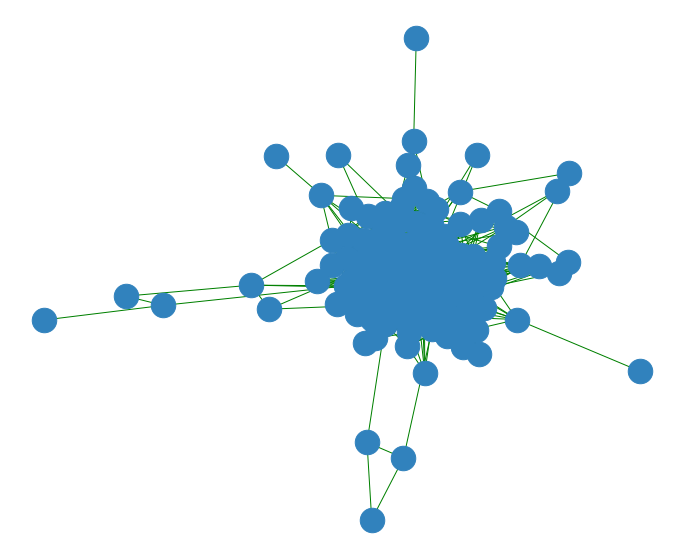

In [26]:
plt.figure(figsize=(12,10))    #creating a network 
pos = nx.layout.spectral_layout(g2)

pos = nx.spring_layout(g2, pos=pos, iterations=50)


nx.draw_networkx_nodes( g2, pos, with_labels=True, node_size=600, node_color="#3182bd" )
nx.draw_networkx_edges( g2, pos,  with_labels=True, edge_color="green", width=1)
plt.axis("off")
plt.show()

<b>Network Characterization : Dataset 1

<b> Density and Paths </b>
    
    
We often look at the level of connectivity within a network - i.e its **density**. A dense network is one where the number of edges is close to the maximum possible number of edges. 

In [27]:
nx.density(g) #Checking the density of the network 1

0.13558663558663558

In [28]:
nx.is_connected(g)  #We can also check if the network is connected - i.e. is there a path between every pair of nodes?

True

In [29]:
nx.shortest_path(g, "Leonardo DiCaprio", "Demi Moore") #The shortest path between two nodes in a network is the path with the minimum number of edges.

['Leonardo DiCaprio', 'Jennifer Garner', 'Demi Moore']

In [30]:
nx.shortest_path_length(g, "Leonardo DiCaprio", "Demi Moore")

2

In [31]:
nx.diameter(g) #The diameter of a network is the length of the longest shortest path between any pair of nodes in the network.

5

<b> Component and Subgraphs </b>
    
Currently, the network consists of one single, large **component** - i.e. the network is **connected**.

In [32]:
nx.number_connected_components(g)

1

In [33]:
nx.is_connected(g)

True

In [34]:
nx.number_connected_components(g)

1

In [35]:
for component in nx.connected_components(g):
    print(component)

{'Drew Barrymore', 'Matthew McConaughey', 'Anne Hathaway', 'Mark Williams', 'Daniel Kaluuya', 'Dustin Hoffman', 'Jeff Bridges', 'Colin Firth', 'Maggie Smith', 'Meryl Streep', 'Gwyneth Paltrow', 'Emma Thompson', 'Kurt Russell', 'Rosario Dawson', 'Art Carney', 'Joe Pesci', 'John Boyega', 'Jamie Lee Curtis', 'Mickey Rourke', 'Maggie Gyllenhaal', 'Geoffrey Rush', 'Ben Kingsley', 'Gwendoline Christie', 'Michelle Monaghan', 'Alexandra Maria Lara', 'Lola Dueñas', 'Pierce Brosnan', 'Adrien Brody', 'Taraneh Alidoosti', 'Bette Midler', 'William Hurt', 'Jessica Tandy', 'Sean Penn', 'Jennifer Garner', 'Meg Ryan', 'Kevin Spacey', 'Sarah Polley', 'Chuck Norris', 'Jennifer Jason Leigh', 'Faye Dunaway', 'Brendan Gleeson', 'Jonah Hill', 'Melissa McCarthy', 'George C. Scott', 'Emily Watson', 'Zooey Deschanel', 'Sharon Stone', 'James Gandolfini', 'Franka Potente', 'Anamaria Marinca', 'Liv Tyler', 'Denzel Washington', 'Golshifteh Farahani', 'Jason Segel', 'Julia Stiles', 'Leonardo DiCaprio', 'Liza Minnell

Rather than looking at components, we might be interested in looking at sub-parts of the network around certain nodes of interest.
In NetworkX, we can access a subgraph by specifying the list of node identifiers:

In [36]:
required = ["Leonardo DiCaprio", "Ben Kingsley", "Demi Moore", "Patricia Clarkson"]
sg = nx.subgraph( g, required )

In [37]:
sg.number_of_nodes(), sg.number_of_edges()

(4, 7)

In [38]:
nx.density(g), nx.density(sg) # subgraph more denser than the orginal graph

(0.13558663558663558, 1.1666666666666667)

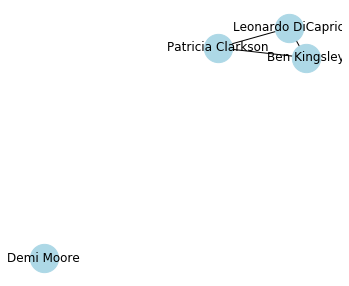

In [39]:
plt.figure(figsize=(6,5))  # Drawing a network of the subgraph
nx.draw_networkx( sg, with_labels=True, node_size=800, node_color="lightblue" )
plt.axis("off")
plt.show()

In [40]:
nx.is_connected(sg) #Not a connected graph

False

<b> Centratility Measures 

Node Degree

The **degree** of a node is the number of nodes which it is connected to in the network - i.e. its number of neighbours. The *degree()* function returns the degree for all nodes in a network, or a specified node.

In [41]:
degrees = dict( g.degree() ) #Creating a dictionary of degrees of every actor 
degrees

{'Leonardo DiCaprio': 23,
 'Demi Moore': 13,
 'Judy Greer': 32,
 'Jet Li': 10,
 'Cate Blanchett': 28,
 'Brendan Gleeson': 40,
 'Jennifer Aniston': 21,
 'Faye Dunaway': 12,
 'Jessica Tandy': 8,
 'Liza Minnelli': 5,
 'Melissa McCarthy': 24,
 'Zooey Deschanel': 13,
 'Cameron Diaz': 28,
 'Sarah Polley': 11,
 'Meryl Streep': 47,
 'Julia Stiles': 16,
 'Emma Thompson': 35,
 'Sean Penn': 28,
 'Richard Harris': 17,
 'Mickey Rourke': 23,
 'Ray Milland': 3,
 'Philip Seymour Hoffman': 34,
 'George C. Scott': 9,
 'Penélope Cruz': 32,
 'Helen McCrory': 20,
 'Chuck Norris': 6,
 'F. Murray Abraham': 20,
 'Ciarán Hinds': 32,
 'Robert Duvall': 24,
 'Chris Rankin': 13,
 'Kenneth Branagh': 28,
 'Jodie Foster': 14,
 'Vinnie Jones': 9,
 'Rachel Weisz': 16,
 'Bruce Willis': 55,
 'Marlee Matlin': 8,
 'Keira Knightley': 21,
 'Jonathan Pryce': 23,
 'Adam Driver': 18,
 'Alexandra Maria Lara': 7,
 'Colin Firth': 30,
 'Jon Voight': 23,
 'Will Smith': 17,
 'Cher': 16,
 'Franka Potente': 10,
 'Tom Hanks': 30,
 'Mari

In [42]:
degree_seq = pd.Series(degrees)
degree_seq

Leonardo DiCaprio      23
Demi Moore             13
Judy Greer             32
Jet Li                 10
Cate Blanchett         28
                       ..
Seann William Scott    12
Daisy Ridley            9
Golshifteh Farahani    11
Kurt Russell           18
Patricia Clarkson      22
Length: 144, dtype: int64

In [43]:
#Printing the mean and median degree of the network 
 
print('Degree range: [%d, %d]' % (degree_seq.min(), degree_seq.max() ) )
print('Mean degree: %.2f' % degree_seq.mean() )
print('Median degree: %d' % degree_seq.median() )

Degree range: [3, 55]
Mean degree: 19.39
Median degree: 18


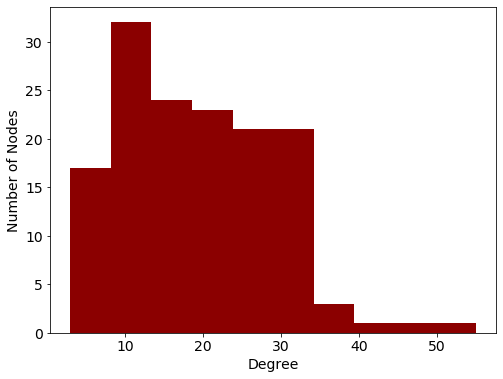

In [44]:
# generating a plot of the degree distribution for this network:
ax = degree_seq.plot.hist(figsize=(8,6), fontsize=14, legend=None, color="darkred")
ax.set_ylabel("Number of Nodes", fontsize=14)
ax.set_xlabel("Degree", fontsize=14);

<b> Measuring Centrality

Centrality analysis allows us to identify the most important nodes in a network. The actual definition of importance depends on the nature of the network, and many different centrality measures exist. NetworkX includes implementations of the most common measures.

The most basic measure of centrality, **degree centrality**, is simply the degree of each node divided by $(n-1)$, where $n$ is the total number of nodes. The output is a dictionary, where the keys are the nodes.

In [45]:
deg = nx.degree_centrality(g)
deg

{'Leonardo DiCaprio': 0.16083916083916083,
 'Demi Moore': 0.09090909090909091,
 'Judy Greer': 0.22377622377622378,
 'Jet Li': 0.06993006993006994,
 'Cate Blanchett': 0.1958041958041958,
 'Brendan Gleeson': 0.27972027972027974,
 'Jennifer Aniston': 0.14685314685314685,
 'Faye Dunaway': 0.08391608391608392,
 'Jessica Tandy': 0.055944055944055944,
 'Liza Minnelli': 0.03496503496503497,
 'Melissa McCarthy': 0.16783216783216784,
 'Zooey Deschanel': 0.09090909090909091,
 'Cameron Diaz': 0.1958041958041958,
 'Sarah Polley': 0.07692307692307693,
 'Meryl Streep': 0.32867132867132864,
 'Julia Stiles': 0.11188811188811189,
 'Emma Thompson': 0.24475524475524477,
 'Sean Penn': 0.1958041958041958,
 'Richard Harris': 0.11888111888111888,
 'Mickey Rourke': 0.16083916083916083,
 'Ray Milland': 0.02097902097902098,
 'Philip Seymour Hoffman': 0.23776223776223776,
 'George C. Scott': 0.06293706293706294,
 'Penélope Cruz': 0.22377622377622378,
 'Helen McCrory': 0.13986013986013987,
 'Chuck Norris': 0.04195

Using these scores to populate a Pandas DataFrame and display a ranking of the nodes by their degree centrality

In [46]:
s = pd.Series(deg)
dff = pd.DataFrame(s,columns=["degree_centrality"])
# display the DataFrame sorted by degree centrality
dff.sort_values(by="degree_centrality",ascending=False).head(10)

,degree_centrality
Bruce Willis,0.384615
Meryl Streep,0.328671
Brendan Gleeson,0.279720
Catherine Keener,0.265734
Emma Thompson,0.244755
William Hurt,0.244755
Ben Kingsley,0.237762
Natalie Portman,0.237762
Philip Seymour Hoffman,0.237762
Matthew McConaughey,0.230769


Another measure, betweenness centrality can be used to find "brokers" or "bridging" nodes in a network. Nodes that occur on many shortest paths between other nodes in the graph have a high betweenness centrality score

In [47]:
bet = nx.betweenness_centrality(g)
bet

{'Leonardo DiCaprio': 0.010479225051965269,
 'Demi Moore': 0.0005730505579276443,
 'Judy Greer': 0.01515333011399176,
 'Jet Li': 0.004209565487870547,
 'Cate Blanchett': 0.011342589338991021,
 'Brendan Gleeson': 0.03361017583294211,
 'Jennifer Aniston': 0.0025047058680965194,
 'Faye Dunaway': 0.0013198284668152595,
 'Jessica Tandy': 0.0001761684252624548,
 'Liza Minnelli': 0.00040195164854563706,
 'Melissa McCarthy': 0.007469752486848318,
 'Zooey Deschanel': 0.0011023774843221118,
 'Cameron Diaz': 0.010379844167133612,
 'Sarah Polley': 0.0011833763767063663,
 'Meryl Streep': 0.03191803325086234,
 'Julia Stiles': 0.004581372126744461,
 'Emma Thompson': 0.016121092653933754,
 'Sean Penn': 0.011631459585323136,
 'Richard Harris': 0.018041735866332183,
 'Mickey Rourke': 0.009382420947661797,
 'Ray Milland': 0.0,
 'Philip Seymour Hoffman': 0.0213923590351512,
 'George C. Scott': 0.0008274735284269544,
 'Penélope Cruz': 0.039679020176189,
 'Helen McCrory': 0.0035724744126521346,
 'Chuck Norr

In [48]:
dff["betweenness"] = pd.Series(bet)
dff.sort_values(by="betweenness",ascending=False).head(10)

,degree_centrality,betweenness
Bruce Willis,0.384615,0.077850
Penélope Cruz,0.223776,0.039679
Brendan Gleeson,0.279720,0.033610
Meryl Streep,0.328671,0.031918
William Hurt,0.244755,0.026591
Ben Kingsley,0.237762,0.025993
Natalie Portman,0.237762,0.023992
Sigourney Weaver,0.230769,0.023892
Judi Dench,0.223776,0.023454
Philip Seymour Hoffman,0.237762,0.021392


In [49]:
close = nx.closeness_centrality(g)
close

{'Leonardo DiCaprio': 0.5088967971530249,
 'Demi Moore': 0.4642857142857143,
 'Judy Greer': 0.5257352941176471,
 'Jet Li': 0.41569767441860467,
 'Cate Blanchett': 0.5315985130111525,
 'Brendan Gleeson': 0.55859375,
 'Jennifer Aniston': 0.4831081081081081,
 'Faye Dunaway': 0.449685534591195,
 'Jessica Tandy': 0.44272445820433437,
 'Liza Minnelli': 0.3743455497382199,
 'Melissa McCarthy': 0.4965277777777778,
 'Zooey Deschanel': 0.4782608695652174,
 'Cameron Diaz': 0.5276752767527675,
 'Sarah Polley': 0.4482758620689655,
 'Meryl Streep': 0.5766129032258065,
 'Julia Stiles': 0.4673202614379085,
 'Emma Thompson': 0.5416666666666666,
 'Sean Penn': 0.5218978102189781,
 'Richard Harris': 0.45686900958466453,
 'Mickey Rourke': 0.5035211267605634,
 'Ray Milland': 0.3142857142857143,
 'Philip Seymour Hoffman': 0.5416666666666666,
 'George C. Scott': 0.4074074074074074,
 'Penélope Cruz': 0.5458015267175572,
 'Helen McCrory': 0.4847457627118644,
 'Chuck Norris': 0.38858695652173914,
 'F. Murray Abr

Closeness centrality measures the extent to which a node is close to all other nodes in a network, either directly or indirectly.

In [1]:
dff["closeness"] = pd.Series(close)
dff.sort_values(by="closeness",ascending=False).head(10)

NameError: name 'pd' is not defined

In [51]:
# The eigenvector centrality of a node proportional to the sum of the centrality scores of its neighbours. This means that a node is important if it connected to other important nodes.
eig = nx.eigenvector_centrality(g)
dff["eigenvector"] = pd.Series(eig)
dff.sort_values(by="eigenvector",ascending=False).head(10)

,degree_centrality,betweenness,closeness,eigenvector
Bruce Willis,0.384615,0.077850,0.588477,0.197636
Meryl Streep,0.328671,0.031918,0.576613,0.194979
Catherine Keener,0.265734,0.020187,0.545802,0.160046
Brendan Gleeson,0.279720,0.033610,0.558594,0.151123
Emma Thompson,0.244755,0.016121,0.541667,0.143820
William Hurt,0.244755,0.026591,0.550000,0.140679
Matthew McConaughey,0.230769,0.012612,0.537594,0.140520
Ben Kingsley,0.237762,0.025993,0.554264,0.138334
Philip Seymour Hoffman,0.237762,0.021392,0.541667,0.137943
Judy Greer,0.223776,0.015153,0.525735,0.132788


In [52]:
# Often the normalised eigenvector centrality is reported to allow for comparisons across different networks. Normalisation is done relative to the maximum value in the current network.
dff["norm_eigenvector"] = dff["eigenvector"]/max(dff["eigenvector"])
dff.sort_values(by="norm_eigenvector",ascending=False).head(10)

,degree_centrality,betweenness,closeness,eigenvector,norm_eigenvector
Bruce Willis,0.384615,0.077850,0.588477,0.197636,1.000000
Meryl Streep,0.328671,0.031918,0.576613,0.194979,0.986557
Catherine Keener,0.265734,0.020187,0.545802,0.160046,0.809802
Brendan Gleeson,0.279720,0.033610,0.558594,0.151123,0.764654
Emma Thompson,0.244755,0.016121,0.541667,0.143820,0.727705
William Hurt,0.244755,0.026591,0.550000,0.140679,0.711810
Matthew McConaughey,0.230769,0.012612,0.537594,0.140520,0.711007
Ben Kingsley,0.237762,0.025993,0.554264,0.138334,0.699942
Philip Seymour Hoffman,0.237762,0.021392,0.541667,0.137943,0.697966
Judy Greer,0.223776,0.015153,0.525735,0.132788,0.671883


As we see from the Data Frame, the order of the ranking produced by the various measures can differ, particularly in the case of betweenness centrality.
We could quantify this by looking at the correlation scores between the different measures (i.e. the columns of the Data Frame):

In [53]:
dff.corr()

,degree_centrality,betweenness,closeness,eigenvector,norm_eigenvector
degree_centrality,1.000000,0.817489,0.922306,0.983825,0.983825
betweenness,0.817489,1.000000,0.666710,0.741149,0.741149
closeness,0.922306,0.666710,1.000000,0.931989,0.931989
eigenvector,0.983825,0.741149,0.931989,1.000000,1.000000
norm_eigenvector,0.983825,0.741149,0.931989,1.000000,1.000000


<b>Network Characterisation: DATASET 2

<b> Density and Paths </b>

We often look at the level of connectivity within a network - i.e its **density**. A dense network is one where the number of edges is close to the maximum possible number of edges. 

In [54]:
nx.density(g2)

0.14380205781479666

In [55]:
nx.is_connected(g2)

True

In [56]:
nx.shortest_path(g2, "Dev Patel", "Sam Neill")

['Dev Patel', 'Nicole Kidman', 'Sam Neill']

In [57]:
nx.shortest_path_length(g2, "Dev Patel", "Sam Neill")

2

In [58]:
nx.diameter(g2)

6

<b> Component and Subgraphs </b>
    
Currently, the network consists of one single, large **component** - i.e. the network is **connected**.

In [59]:
nx.number_connected_components(g2)

1

In [60]:
nx.is_connected(g2)

True

In [61]:
for component in nx.connected_components(g2):
    print(component)

{'Adam Sandler', 'Nicole Kidman', 'Tilda Swinton', 'Geraldine Page', 'Kali Hawk', 'Sylvester Stallone', 'Tom Felton', 'Ralph Fiennes', 'David Niven', 'Clint Eastwood', 'Rebel Wilson', 'Patrick Wilson', 'Jim Carrey', 'Robbie Coltrane', 'Geena Davis', 'Saoirse Ronan', 'Al Pacino', 'Marion Cotillard', 'Steven Seagal', 'Nicolas Cage', 'Audrey Tautou', 'Karan Soni', 'Debra Messing', 'Amy Adams', 'Kate Hudson', 'Tom Yi', 'Gabriel Byrne', 'Eddie Murphy', 'Ian Hart', 'Sam Neill', 'Birgit Minichmayr', 'Jack Lemmon', 'Andie MacDowell', 'Barbra Streisand', 'Mélanie Laurent', 'Juliane Köhler', 'Michael Gambon', 'Tom Vaughan-Lawlor', 'Rachel McAdams', 'Alan Rickman', 'Anthony Hopkins', "Lupita Nyong'o", 'Mindy Kaling', 'Scarlett Johansson', 'Pam Ferris', 'Jane Fonda', 'Miranda Otto', 'José Ferrer', 'Samantha Morton', 'Anna Kendrick', 'Richard Dreyfuss', 'Forest Whitaker', 'Viola Davis', 'Carrie Fisher', 'Julie Christie', 'Sandra Bullock', 'Jim Broadbent', 'Jason Isaacs', 'Jason Statham', 'Rupert Gr

In [62]:
required = ["Sam Neill", "Dev Patel", "Jack Black", "Jim Carrey"]
sg2 = nx.subgraph( g2, required )

In [63]:
sg2.number_of_nodes(), sg2.number_of_edges()

(4, 5)

In [64]:
nx.density(g2), nx.density(sg2)

(0.14380205781479666, 0.8333333333333334)

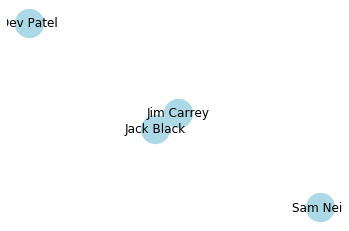

In [65]:
plt.figure(figsize=(6,4))
nx.draw_networkx( sg2, with_labels=True, node_size=800, node_color="lightblue" )
plt.axis("off")
plt.show()

In [66]:
nx.is_connected(sg2)

False

<b> Centratility Measures 

Node Degree

The **degree** of a node is the number of nodes which it is connected to in the network - i.e. its number of neighbours. The *degree()* function returns the degree for all nodes in a network, or a specified node.

In [67]:
degrees = dict( g2.degree() )
degrees

{"Lupita Nyong'o": 18,
 'Diane Keaton': 24,
 'Dev Patel': 8,
 'Seána Kerslake': 3,
 'Sam Neill': 24,
 'Scarlett Johansson': 34,
 'Geena Davis': 11,
 'Colin Farrell': 23,
 'Gregory Peck': 7,
 'Willem Dafoe': 49,
 'Julie Walters': 28,
 'Marcia Gay Harden': 22,
 'Anna Kendrick': 14,
 'Richard Dreyfuss': 31,
 'Charlize Theron': 30,
 'Adam Sandler': 22,
 'Tom Vaughan-Lawlor': 15,
 'Pam Ferris': 20,
 'Imelda Staunton': 28,
 'Broderick Crawford': 3,
 'Sissy Spacek': 15,
 'Kelly Marie Tran': 13,
 'Ian Hart': 27,
 'Burt Lancaster': 7,
 'Anthony Hopkins': 34,
 'Ellen Burstyn': 29,
 'Timothée Chalamet': 15,
 'Billy Dee Williams': 23,
 'Jim Carrey': 21,
 'Arnold Schwarzenegger': 18,
 'Daniel Radcliffe': 25,
 'Sandra Bullock': 21,
 'Owen Wilson': 41,
 'Tom Felton': 21,
 'Jason Isaacs': 34,
 'Seth Rogen': 31,
 'Taron Egerton': 15,
 'Mélanie Laurent': 10,
 'Cliff Robertson': 5,
 'Mark Ruffalo': 35,
 'Harrison Ford': 35,
 'Hye-jeong Kang': 3,
 'Kathy Bates': 42,
 'Jamie Foxx': 28,
 'Toby Jones': 45,
 

In [68]:
degree_seq = pd.Series(degrees)
degree_seq

Lupita Nyong'o    18
Diane Keaton      24
Dev Patel          8
Seána Kerslake     3
Sam Neill         24
                  ..
Ewan McGregor     39
José Ferrer        5
Susan Sarandon    52
Julia Jentsch      4
Jack Nicholson    32
Length: 157, dtype: int64

In [69]:
print('Degree range: [%d, %d]' % (degree_seq.min(), degree_seq.max() ) )
print('Mean degree: %.2f' % degree_seq.mean() )
print('Median degree: %d' % degree_seq.median() )

Degree range: [3, 52]
Mean degree: 22.43
Median degree: 22


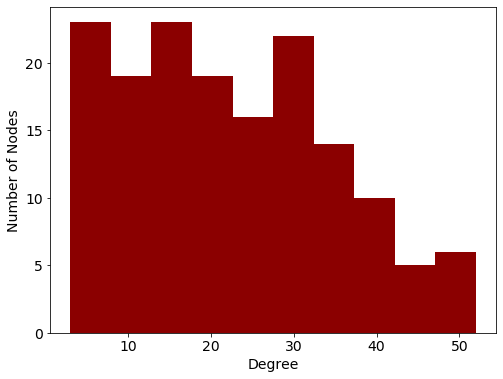

In [70]:
ax = degree_seq.plot.hist(figsize=(8,6), fontsize=14, legend=None, color="darkred")
ax.set_ylabel("Number of Nodes", fontsize=14)
ax.set_xlabel("Degree", fontsize=14);

<b> Measuring Centrality </b>

Centrality analysis allows us to identify the most important nodes in a network. The actual definition of importance depends on the nature of the network, and many different centrality measures exist. NetworkX includes implementations of the most common measures.

The most basic measure of centrality, **degree centrality**, is simply the degree of each node divided by $(n-1)$, where $n$ is the total number of nodes. The output is a dictionary, where the keys are the nodes.

In [71]:
deg = nx.degree_centrality(g2)
deg

{"Lupita Nyong'o": 0.11538461538461538,
 'Diane Keaton': 0.15384615384615385,
 'Dev Patel': 0.05128205128205128,
 'Seána Kerslake': 0.019230769230769232,
 'Sam Neill': 0.15384615384615385,
 'Scarlett Johansson': 0.21794871794871795,
 'Geena Davis': 0.07051282051282051,
 'Colin Farrell': 0.14743589743589744,
 'Gregory Peck': 0.04487179487179487,
 'Willem Dafoe': 0.3141025641025641,
 'Julie Walters': 0.1794871794871795,
 'Marcia Gay Harden': 0.14102564102564102,
 'Anna Kendrick': 0.08974358974358974,
 'Richard Dreyfuss': 0.1987179487179487,
 'Charlize Theron': 0.1923076923076923,
 'Adam Sandler': 0.14102564102564102,
 'Tom Vaughan-Lawlor': 0.09615384615384615,
 'Pam Ferris': 0.1282051282051282,
 'Imelda Staunton': 0.1794871794871795,
 'Broderick Crawford': 0.019230769230769232,
 'Sissy Spacek': 0.09615384615384615,
 'Kelly Marie Tran': 0.08333333333333333,
 'Ian Hart': 0.17307692307692307,
 'Burt Lancaster': 0.04487179487179487,
 'Anthony Hopkins': 0.21794871794871795,
 'Ellen Burstyn': 

In [72]:
s = pd.Series(deg)
dff2 = pd.DataFrame(s,columns=["degree_centrality"])
# display the DataFrame sorted by degree centrality
dff2.sort_values(by="degree_centrality",ascending=False).head(10)

,degree_centrality
Susan Sarandon,0.333333
Ralph Fiennes,0.326923
Robert De Niro,0.326923
Willem Dafoe,0.314103
Edward Norton,0.307692
Julianne Moore,0.307692
Jim Broadbent,0.301282
Helen Mirren,0.294872
Toby Jones,0.288462
Michael Gambon,0.282051


In [73]:
bet = nx.betweenness_centrality(g2)
bet

{"Lupita Nyong'o": 0.0010413257107721717,
 'Diane Keaton': 0.00884579075209362,
 'Dev Patel': 0.0001464308290304318,
 'Seána Kerslake': 0.0,
 'Sam Neill': 0.0028349299818373774,
 'Scarlett Johansson': 0.010961002143277646,
 'Geena Davis': 0.0006930073312672272,
 'Colin Farrell': 0.0030883242118783494,
 'Gregory Peck': 0.004908163504942028,
 'Willem Dafoe': 0.04715035672838711,
 'Julie Walters': 0.003350047508582916,
 'Marcia Gay Harden': 0.0035264918185733017,
 'Anna Kendrick': 0.002175071814148359,
 'Richard Dreyfuss': 0.04115731923023231,
 'Charlize Theron': 0.013535448257762843,
 'Adam Sandler': 0.009418852149328267,
 'Tom Vaughan-Lawlor': 0.0014688071675161272,
 'Pam Ferris': 0.0006840286176386706,
 'Imelda Staunton': 0.007492214518800588,
 'Broderick Crawford': 0.0,
 'Sissy Spacek': 0.0010762392517982165,
 'Kelly Marie Tran': 0.0007566462488395798,
 'Ian Hart': 0.005185130491165983,
 'Burt Lancaster': 0.001946343988387102,
 'Anthony Hopkins': 0.005749081647363838,
 'Ellen Burstyn'

In [74]:
dff2["betweenness"] = pd.Series(bet)
dff2.sort_values(by="betweenness",ascending=False).head(10)

,degree_centrality,betweenness
Robert De Niro,0.326923,0.052350
Willem Dafoe,0.314103,0.047150
Richard Dreyfuss,0.198718,0.041157
Helen Mirren,0.294872,0.039494
Susan Sarandon,0.333333,0.032674
Alan Rickman,0.217949,0.025227
Jack Black,0.217949,0.022782
Owen Wilson,0.262821,0.020942
Michael Gambon,0.282051,0.020357
Harrison Ford,0.224359,0.019619


In [75]:
close = nx.closeness_centrality(g2)
close

{"Lupita Nyong'o": 0.46706586826347307,
 'Diane Keaton': 0.4936708860759494,
 'Dev Patel': 0.416,
 'Seána Kerslake': 0.3058823529411765,
 'Sam Neill': 0.4984025559105431,
 'Scarlett Johansson': 0.5131578947368421,
 'Geena Davis': 0.43820224719101125,
 'Colin Farrell': 0.47560975609756095,
 'Gregory Peck': 0.39,
 'Willem Dafoe': 0.5714285714285714,
 'Julie Walters': 0.49056603773584906,
 'Marcia Gay Harden': 0.484472049689441,
 'Anna Kendrick': 0.4444444444444444,
 'Richard Dreyfuss': 0.5217391304347826,
 'Charlize Theron': 0.5165562913907285,
 'Adam Sandler': 0.4875,
 'Tom Vaughan-Lawlor': 0.45614035087719296,
 'Pam Ferris': 0.46567164179104475,
 'Imelda Staunton': 0.4921135646687697,
 'Broderick Crawford': 0.2578512396694215,
 'Sissy Spacek': 0.46017699115044247,
 'Kelly Marie Tran': 0.4431818181818182,
 'Ian Hart': 0.4875,
 'Burt Lancaster': 0.42276422764227645,
 'Anthony Hopkins': 0.50814332247557,
 'Ellen Burstyn': 0.5148514851485149,
 'Timothée Chalamet': 0.4588235294117647,
 'Bil

In [76]:
dff2["closeness"] = pd.Series(close)
dff2.sort_values(by="closeness",ascending=False).head(10)

,degree_centrality,betweenness,closeness
Susan Sarandon,0.333333,0.032674,0.577778
Willem Dafoe,0.314103,0.047150,0.571429
Robert De Niro,0.326923,0.052350,0.571429
Edward Norton,0.307692,0.014239,0.563177
Helen Mirren,0.294872,0.039494,0.563177
Ralph Fiennes,0.326923,0.017263,0.553191
Julianne Moore,0.307692,0.016196,0.551237
Jim Broadbent,0.301282,0.016183,0.551237
Kate Winslet,0.275641,0.011409,0.549296
Toby Jones,0.288462,0.017890,0.547368


In [77]:
eig = nx.eigenvector_centrality(g2)
dff2["eigenvector"] = pd.Series(eig)
dff2.sort_values(by="eigenvector",ascending=False).head(10)

,degree_centrality,betweenness,closeness,eigenvector
Ralph Fiennes,0.326923,0.017263,0.553191,0.176716
Edward Norton,0.307692,0.014239,0.563177,0.170376
Susan Sarandon,0.333333,0.032674,0.577778,0.165133
Julianne Moore,0.307692,0.016196,0.551237,0.159945
Jim Broadbent,0.301282,0.016183,0.551237,0.158275
Kate Winslet,0.275641,0.011409,0.549296,0.157667
Willem Dafoe,0.314103,0.047150,0.571429,0.155877
Robert De Niro,0.326923,0.052350,0.571429,0.153167
Michael Gambon,0.282051,0.020357,0.543554,0.152357
Helen Mirren,0.294872,0.039494,0.563177,0.150943


In [78]:
dff2["norm_eigenvector"] = dff2["eigenvector"]/max(dff2["eigenvector"])
dff2.sort_values(by="norm_eigenvector",ascending=False).head(10)

,degree_centrality,betweenness,closeness,eigenvector,norm_eigenvector
Ralph Fiennes,0.326923,0.017263,0.553191,0.176716,1.000000
Edward Norton,0.307692,0.014239,0.563177,0.170376,0.964120
Susan Sarandon,0.333333,0.032674,0.577778,0.165133,0.934452
Julianne Moore,0.307692,0.016196,0.551237,0.159945,0.905097
Jim Broadbent,0.301282,0.016183,0.551237,0.158275,0.895642
Kate Winslet,0.275641,0.011409,0.549296,0.157667,0.892205
Willem Dafoe,0.314103,0.047150,0.571429,0.155877,0.882072
Robert De Niro,0.326923,0.052350,0.571429,0.153167,0.866737
Michael Gambon,0.282051,0.020357,0.543554,0.152357,0.862156
Helen Mirren,0.294872,0.039494,0.563177,0.150943,0.854152


As we see from the Data Frame, the order of the ranking produced by the various measures can differ, particularly in the case of betweenness centrality.
We could quantify this by looking at the correlation scores between the different measures (i.e. the columns of the Data Frame):

In [79]:
dff2.corr()

,degree_centrality,betweenness,closeness,eigenvector,norm_eigenvector
degree_centrality,1.000000,0.727118,0.904483,0.986211,0.986211
betweenness,0.727118,1.000000,0.589756,0.671616,0.671616
closeness,0.904483,0.589756,1.000000,0.894402,0.894402
eigenvector,0.986211,0.671616,0.894402,1.000000,1.000000
norm_eigenvector,0.986211,0.671616,0.894402,1.000000,1.000000


In [80]:
dff2["betweenness"].rank( ascending=False )

Lupita Nyong'o    122.0
Diane Keaton       52.0
Dev Patel         145.0
Seána Kerslake    154.0
Sam Neill          95.0
                  ...  
Ewan McGregor      24.0
José Ferrer        26.0
Susan Sarandon      5.0
Julia Jentsch     154.0
Jack Nicholson     80.0
Name: betweenness, Length: 157, dtype: float64

<b> COMPARISON OF TWO NETWORKS 

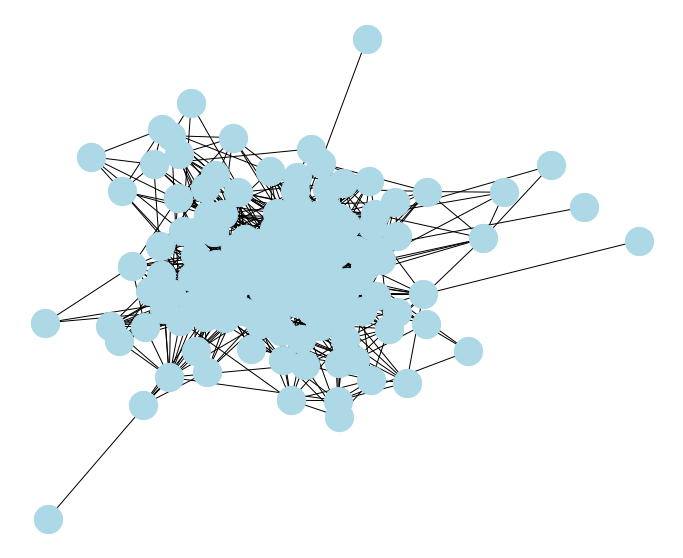

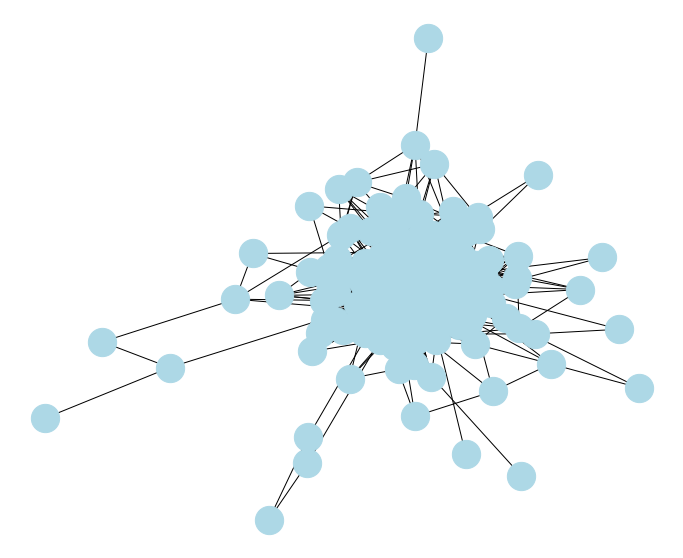

In [81]:
# Drawing the structure of two networks


plt.figure(figsize=(12,10))                  
nx.draw_networkx( g, with_labels=False, node_size=800, node_color="lightblue" )
plt.axis("off")
plt.show()

plt.figure(figsize=(12,10))
nx.draw_networkx( g2, with_labels=False, node_size=800, node_color="lightblue" )
plt.axis("off")
plt.show()

In [82]:
nx.density(g), nx.density(g2)  #Comparing the density of both networks

(0.13558663558663558, 0.14380205781479666)

In [83]:
nx.diameter(g), nx.diameter(g2) # Comparing the longest shortest path i.e. diameter, of both networks.

(5, 6)

We can conclude by comparing the degrees of nodes for both networks.


DATASET 1 - NETWORK 1: 

Degree range: [3, 55]
Mean degree: 19.39
Median degree: 18



DATASET 2 - NETWORK 2:

Degree range: [3, 52]
Mean degree: 22.43
Median degree: 22


From the graphs above, we can see that both networks are quite similar to each other. Even if we compare the mean/median degree of both networks, it is very similar. Even the density and diameter of both networks are pretty much the same. 

<b> Ego-Centric Analysis

DATASET 1 - NETWORK 1

In [84]:
ego_node = "Bruce Willis"    # One of the most important node in network 1 if not the most important 
alters = g.neighbors(ego_node)            #Takes the neighbouring nodes
for node in alters:
    print(node)

Faye Dunaway
Bruce Willis
Paul Newman
Joan Allen
F. Murray Abraham
Tom Hanks
Colm Meaney
Dustin Hoffman
James Gandolfini
Demi Moore
Meryl Streep
Goldie Hawn
Marlee Matlin
Cher
Rod Steiger
Louise Fletcher
Jessica Tandy
Philip Seymour Hoffman
Uma Thurman
Marisa Tomei
Charlton Heston
Liv Tyler
Denzel Washington
Betty White
Toni Collette
Melissa McCarthy
Cate Blanchett
Cameron Diaz
Drew Barrymore
Steve Carell
Mickey Rourke
Rosario Dawson
Ben Kingsley
Sharon Stone
Kurt Russell
Sean Penn
Catherine Keener
Jet Li
Dolph Lundgren
Terry Crews
Sigourney Weaver
Seann William Scott
Jonathan Pryce
Chuck Norris
Vinnie Jones
Zooey Deschanel
Penélope Cruz
Judi Dench
Abigail Breslin
Jonah Hill
Maya Rudolph
Will Ferrell
Adrien Brody
Matthew McConaughey


In [85]:
eg = nx.ego_graph( g, ego_node ) # Creating a ego centric graph keeping the ego node at its centre 

In [86]:
list( eg.nodes() )

['Jonah Hill',
 'Melissa McCarthy',
 'Drew Barrymore',
 'Zooey Deschanel',
 'James Gandolfini',
 'Rod Steiger',
 'Sharon Stone',
 'Matthew McConaughey',
 'Liv Tyler',
 'Denzel Washington',
 'Betty White',
 'Maya Rudolph',
 'Tom Hanks',
 'Colm Meaney',
 'Dustin Hoffman',
 'Penélope Cruz',
 'Joan Allen',
 'Dolph Lundgren',
 'Charlton Heston',
 'Meryl Streep',
 'Toni Collette',
 'Rosario Dawson',
 'Kurt Russell',
 'Terry Crews',
 'Demi Moore',
 'Abigail Breslin',
 'Mickey Rourke',
 'F. Murray Abraham',
 'Uma Thurman',
 'Cher',
 'Vinnie Jones',
 'Paul Newman',
 'Ben Kingsley',
 'Philip Seymour Hoffman',
 'Adrien Brody',
 'Catherine Keener',
 'Jessica Tandy',
 'Louise Fletcher',
 'Sean Penn',
 'Will Ferrell',
 'Chuck Norris',
 'Jonathan Pryce',
 'Marlee Matlin',
 'Goldie Hawn',
 'Bruce Willis',
 'Cate Blanchett',
 'Sigourney Weaver',
 'Jet Li',
 'Judi Dench',
 'Steve Carell',
 'Seann William Scott',
 'Cameron Diaz',
 'Faye Dunaway',
 'Marisa Tomei']

In [87]:
list( eg.edges() )

[('Jonah Hill', 'Dustin Hoffman'),
 ('Jonah Hill', 'Jonah Hill'),
 ('Jonah Hill', 'Terry Crews'),
 ('Jonah Hill', 'Steve Carell'),
 ('Jonah Hill', 'Catherine Keener'),
 ('Jonah Hill', 'Dolph Lundgren'),
 ('Jonah Hill', 'Melissa McCarthy'),
 ('Jonah Hill', 'Matthew McConaughey'),
 ('Jonah Hill', 'Will Ferrell'),
 ('Jonah Hill', 'Philip Seymour Hoffman'),
 ('Jonah Hill', 'Colm Meaney'),
 ('Jonah Hill', 'Marisa Tomei'),
 ('Jonah Hill', 'Cate Blanchett'),
 ('Jonah Hill', 'F. Murray Abraham'),
 ('Jonah Hill', 'Bruce Willis'),
 ('Jonah Hill', 'Maya Rudolph'),
 ('Jonah Hill', 'Rosario Dawson'),
 ('Melissa McCarthy', 'Melissa McCarthy'),
 ('Melissa McCarthy', 'Cameron Diaz'),
 ('Melissa McCarthy', 'Drew Barrymore'),
 ('Melissa McCarthy', 'Will Ferrell'),
 ('Melissa McCarthy', 'Bruce Willis'),
 ('Melissa McCarthy', 'Sigourney Weaver'),
 ('Melissa McCarthy', 'Maya Rudolph'),
 ('Melissa McCarthy', 'Terry Crews'),
 ('Melissa McCarthy', 'Toni Collette'),
 ('Drew Barrymore', 'Drew Barrymore'),
 ('Dr

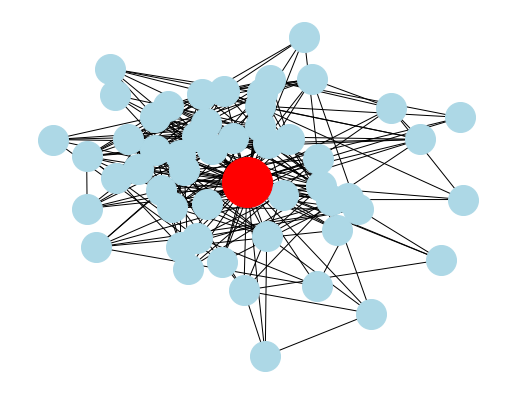

In [88]:
plt.figure(figsize=(9,7))
# lay out all nodes
pos = nx.spring_layout(g)
# draw the full network
nx.draw_networkx(eg, pos, with_labels=False, font_size=13, node_size=900, node_color="lightblue")
# draw the ego in red, with larger node size
nx.draw_networkx_nodes(eg, pos, nodelist=[ego_node], with_labels=True, font_size=13, node_size=2500, node_color="red")
plt.axis("off")
plt.show()

Let's wrap this up as a single function. 

In [89]:
def display_ego( g, ego_node ):
    # build the ego network
    eg = nx.ego_graph( g, ego_node )
    # create the figure
    plt.figure(figsize=(9,7))
    title = "Ego network for %s (%d nodes)" % (ego_node, eg.number_of_nodes())
    plt.title(title, fontsize=14)
    # lay out all nodes
    pos = nx.spring_layout(g)
    # draw the full network
    nx.draw_networkx(eg, pos, with_labels=False, font_size=13, node_size=900, node_color="lightblue")
    # draw the ego in red, with larger node size
    nx.draw_networkx_nodes(eg, pos, nodelist=[ego_node], with_labels=True, font_size=13, node_size=2500, node_color="red")
    plt.axis("off")
    plt.show()    

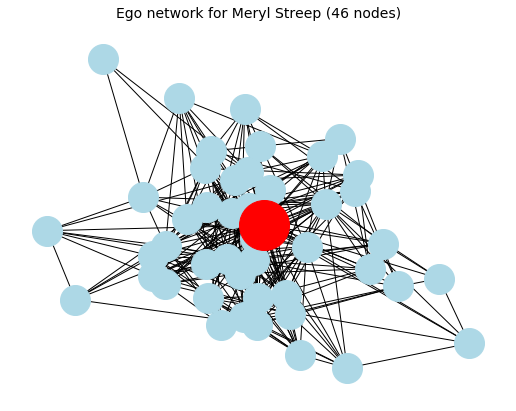

In [90]:
display_ego( g, "Meryl Streep" )

In [91]:
nx.density(eg)

0.23270440251572327

In [92]:
nx.is_connected(eg)

True

In [93]:
nx.diameter(eg)

2

In [94]:
nx.number_connected_components(g)

1

<b>DATASET 2 - NETWORK 2:

In [95]:
ego_node2 = "Robert De Niro"      # Setting the ego node (most important node based on all centrality measures) for network 2 
alters = g2.neighbors(ego_node2)
for node in alters:
    print(node)

Burt Lancaster
Robert De Niro
Jack Nicholson
Jennifer Connelly
Jim Broadbent
Jeremy Irons
Willem Dafoe
Ellen Burstyn
Jane Fonda
Gregory Peck
Jessica Lange
Al Pacino
Wesley Snipes
Jack Black
Diane Keaton
Sylvester Stallone
Chris Tucker
Woody Harrelson
Whoopi Goldberg
Charlize Theron
Owen Wilson
Ben Stiller
Edward Norton
Frances McDormand
Eddie Murphy
Barbra Streisand
Matt Damon
Michael Gambon
Kathy Bates
Gabriel Byrne
Julianne Moore
Ian McKellen
Michelle Pfeiffer
Laura Dern
Steven Seagal
Jennifer Lawrence
Michael Douglas
Jason Statham
Katherine Heigl
Ashton Kutcher
Kim Basinger
Toby Jones
Amy Adams
Forest Whitaker
Susan Sarandon
Leslie Mann
Jennifer Hudson
Patrick Wilson
Helen Mirren
Kate Winslet


In [96]:
eg2 = nx.ego_graph( g2, ego_node2 )  # Creating the ego centric graph 

In [97]:
list( eg2.nodes() )

['Jane Fonda',
 'Frances McDormand',
 'Edward Norton',
 'Forest Whitaker',
 'Sylvester Stallone',
 'Charlize Theron',
 'Susan Sarandon',
 'Robert De Niro',
 'Helen Mirren',
 'Jim Broadbent',
 'Patrick Wilson',
 'Jason Statham',
 'Jennifer Lawrence',
 'Ian McKellen',
 'Jessica Lange',
 'Al Pacino',
 'Wesley Snipes',
 'Diane Keaton',
 'Steven Seagal',
 'Laura Dern',
 'Jennifer Connelly',
 'Julianne Moore',
 'Chris Tucker',
 'Matt Damon',
 'Owen Wilson',
 'Woody Harrelson',
 'Leslie Mann',
 'Katherine Heigl',
 'Ashton Kutcher',
 'Kim Basinger',
 'Ellen Burstyn',
 'Michelle Pfeiffer',
 'Toby Jones',
 'Amy Adams',
 'Burt Lancaster',
 'Gabriel Byrne',
 'Michael Douglas',
 'Jack Nicholson',
 'Willem Dafoe',
 'Jeremy Irons',
 'Eddie Murphy',
 'Jennifer Hudson',
 'Barbra Streisand',
 'Ben Stiller',
 'Jack Black',
 'Michael Gambon',
 'Whoopi Goldberg',
 'Kate Winslet',
 'Gregory Peck',
 'Kathy Bates']

In [98]:
list( eg2.edges() )

[('Jane Fonda', 'Jane Fonda'),
 ('Jane Fonda', 'Michael Douglas'),
 ('Jane Fonda', 'Kathy Bates'),
 ('Jane Fonda', 'Gregory Peck'),
 ('Jane Fonda', 'Robert De Niro'),
 ('Jane Fonda', 'Woody Harrelson'),
 ('Jane Fonda', 'Forest Whitaker'),
 ('Jane Fonda', 'Diane Keaton'),
 ('Frances McDormand', 'Frances McDormand'),
 ('Frances McDormand', 'Willem Dafoe'),
 ('Frances McDormand', 'Susan Sarandon'),
 ('Frances McDormand', 'Gabriel Byrne'),
 ('Frances McDormand', 'Julianne Moore'),
 ('Frances McDormand', 'Edward Norton'),
 ('Frances McDormand', 'Jack Black'),
 ('Frances McDormand', 'Michael Douglas'),
 ('Frances McDormand', 'Robert De Niro'),
 ('Frances McDormand', 'Diane Keaton'),
 ('Frances McDormand', 'Jack Nicholson'),
 ('Frances McDormand', 'Charlize Theron'),
 ('Frances McDormand', 'Woody Harrelson'),
 ('Frances McDormand', 'Michael Gambon'),
 ('Frances McDormand', 'Amy Adams'),
 ('Frances McDormand', 'Ben Stiller'),
 ('Frances McDormand', 'Matt Damon'),
 ('Frances McDormand', 'Owen W

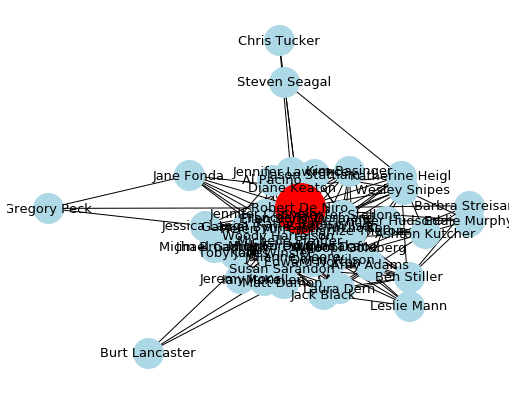

In [99]:
plt.figure(figsize=(9,7))
# lay out all nodes
pos = nx.spring_layout(g2)
# draw the full network
nx.draw_networkx(eg2, pos, with_labels=True, font_size=13, node_size=900, node_color="lightblue")
# draw the ego in red, with larger node size
nx.draw_networkx_nodes(eg2, pos, nodelist=[ego_node2], with_labels=True, font_size=13, node_size=2500, node_color="red")
plt.axis("off")
plt.show()

Let's wrap this up as a single function. 

In [100]:
def display_ego( g2, ego_node2 ):
    # build the ego network
    eg2 = nx.ego_graph( g2, ego_node2 )
    # create the figure
    plt.figure(figsize=(9,7))
    title = "Ego network for %s (%d nodes)" % (ego_node2, eg.number_of_nodes())
    plt.title(title, fontsize=14)
    # lay out all nodes
    pos = nx.spring_layout(g2)
    # draw the full network
    nx.draw_networkx(eg2, pos, with_labels=True, font_size=13, node_size=900, node_color="lightblue")
    # draw the ego in red, with larger node size
    nx.draw_networkx_nodes(eg2, pos, nodelist=[ego_node2], with_labels=True, font_size=13, node_size=2500, node_color="red")
    plt.axis("off")
    plt.show()    

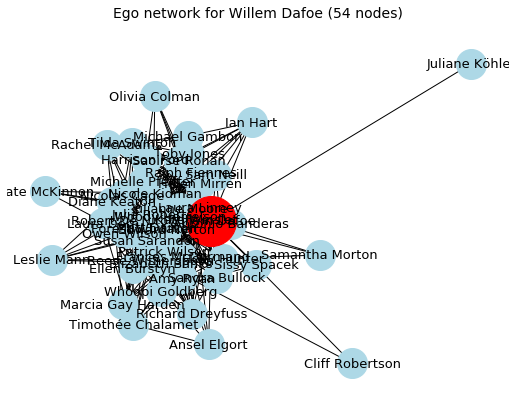

In [101]:
display_ego( g2, "Willem Dafoe" )

In [102]:
nx.density(eg2)

0.32979591836734695

In [107]:
nx.is_connected(eg2)

True

In [108]:
nx.diameter(eg2)

2

<b> Network Visualization

In [103]:
nx.write_gexf(g, "Network1.gexf", prettyprint=True)  # Exporting network 1 in gexf format for use in GEPHI 

In [104]:
lines = open("Network1.gexf","r").readlines()
lines[0:10]

["<?xml version='1.0' encoding='utf-8'?>\n",
 '<gexf version="1.2" xmlns="http://www.gexf.net/1.2draft" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://www.w3.org/2001/XMLSchema-instance">\n',
 '  <graph defaultedgetype="undirected" mode="static" name="">\n',
 '    <meta>\n',
 '      <creator>NetworkX 2.3</creator>\n',
 '      <lastmodified>26/02/2020</lastmodified>\n',
 '    </meta>\n',
 '    <nodes>\n',
 '      <node id="Leonardo DiCaprio" label="Leonardo DiCaprio" />\n',
 '      <node id="Demi Moore" label="Demi Moore" />\n']

In [105]:
nx.write_gexf(g2, "Network2.gexf", prettyprint=True) # Exporting network 2 in gexf format for use in GEPHI 

In [106]:
lines = open("Network2.gexf","r").readlines()
lines[0:10]

["<?xml version='1.0' encoding='utf-8'?>\n",
 '<gexf version="1.2" xmlns="http://www.gexf.net/1.2draft" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://www.w3.org/2001/XMLSchema-instance">\n',
 '  <graph defaultedgetype="undirected" mode="static" name="">\n',
 '    <meta>\n',
 '      <creator>NetworkX 2.3</creator>\n',
 '      <lastmodified>26/02/2020</lastmodified>\n',
 '    </meta>\n',
 '    <nodes>\n',
 '      <node id="Lupita Nyong\'o" label="Lupita Nyong\'o" />\n',
 '      <node id="Diane Keaton" label="Diane Keaton" />\n']

The GEXF file has been loaded in Gephi. Using the layout functionality a
useful visualisation of the network has been produced. The png files have been attached along with this notebook. 

# CONCLUSION 

From both the datasets, we can see how clustered and interconnected both networks are. There were very few isolated nodes which were removed. By calculating the degree of nodes, we could see how important few people were in the network, having done movies with most of the other actors. 

We have measured the importance of the nodes by centrality measures, like measuring the betweeness, closeness and eigenvector centrality. For example, we can see that in Network 1, Bruce Willis comfortably leads the charts in almost every aspect while in Network 2, Robert De Niro is one of the such actors who is very well connected to others.  

On Comparing the network of both the datasets, we see how similar both of them are. Upon close observation of a few more datasets, we might be able to say that the structure of overall network stays the same. Both our networks are very similar in terms of density and measuring the diameter as well. 